<a href="https://colab.research.google.com/github/GreisonMontenari/Cartorioebac/blob/main/Profissao_Analista_de_dados_M24_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
penguim = sns.load_dataset('penguins')

In [3]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

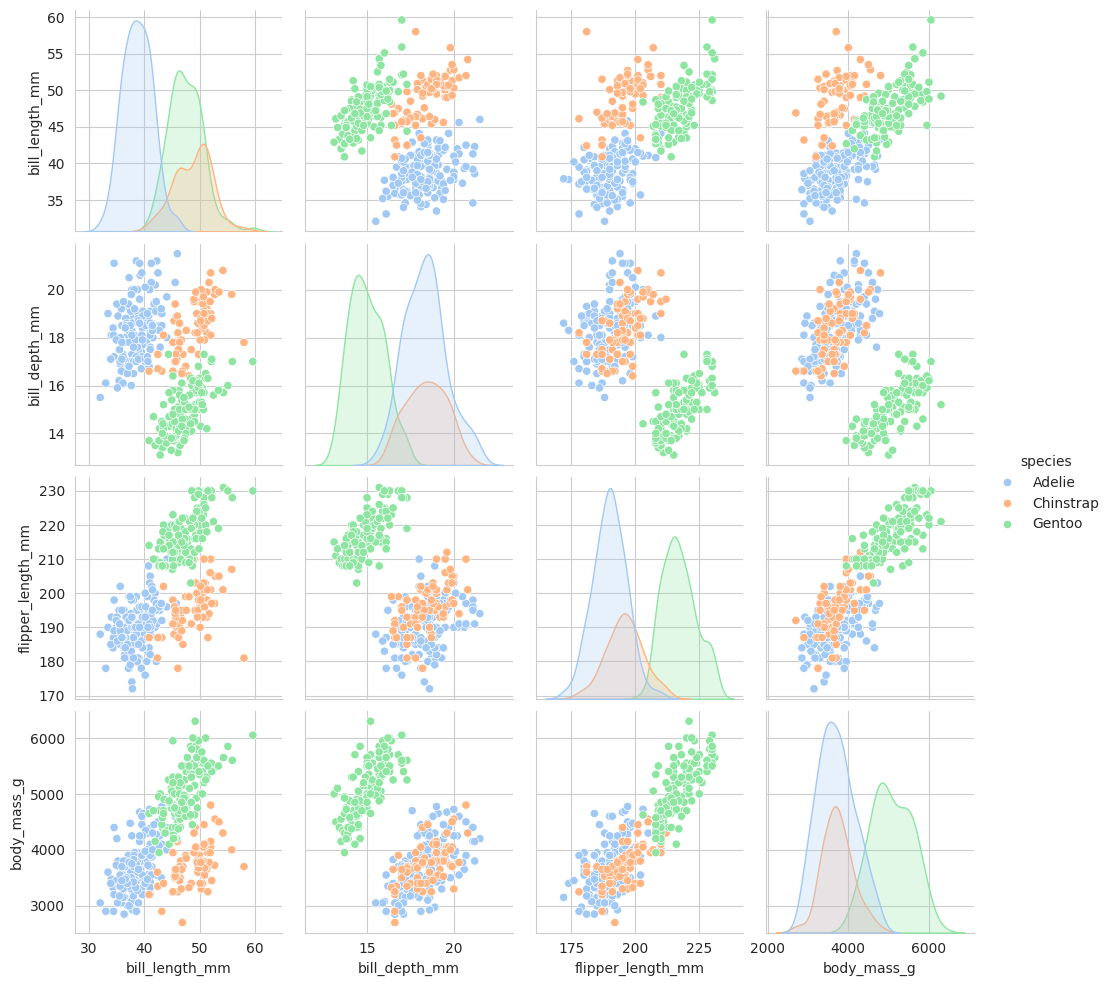

In [4]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:** ?  Os gráficos gerados pelo pairplot ajudam a identificar padrões, relações e diferenças nos atributos numéricos das espécies de pinguins. Essa análise visual pode guiar etapas subsequentes de modelagem, como a seleção de variáveis mais relevantes ou a aplicação de técnicas de classificação.

 - Sexo por espécie:

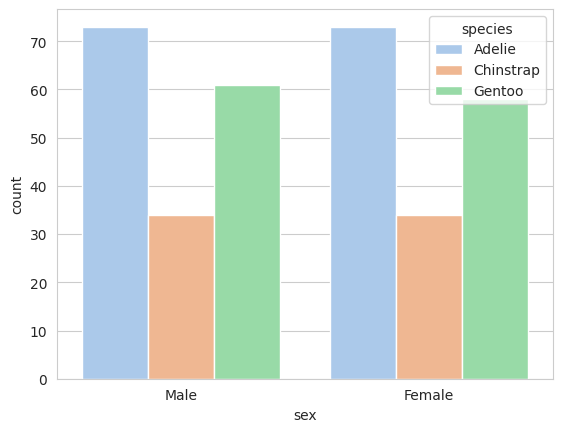

In [5]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:** ?  Este gráfico de contagem é útil para visualizar e comparar a distribuição de sexo entre as diferentes espécies de pinguins. Ele ajuda a identificar desequilíbrios ou padrões no conjunto de dados que podem ser importantes para a análise subsequente ou para a compreensão das características demográficas das espécies.

 - Ilha por espécie:

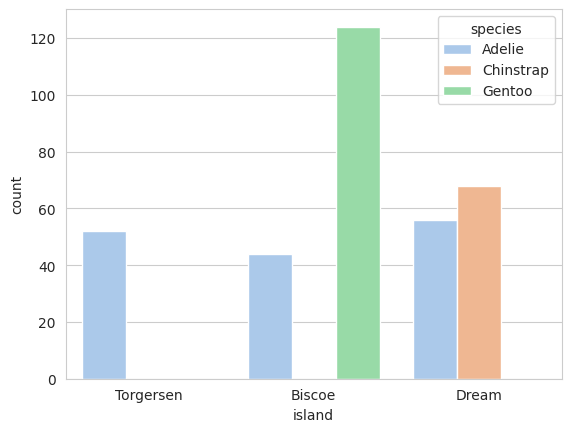

In [6]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** ?  Este gráfico de contagem é útil para visualizar e comparar a distribuição das espécies de pinguins entre as diferentes ilhas. Ele ajuda a identificar padrões de habitat e a entender melhor como as espécies estão distribuídas geograficamente no conjunto de dados. Essas informações podem ser valiosas para análises ecológicas e para a compreensão dos fatores que influenciam a presença das espécies em diferentes locais.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

Valores nulos por coluna antes do tratamento:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Valores nulos por coluna após o tratamento:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


<ipython-input-7-b2aba20bc803>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguim[column].fillna(penguim[column].mean(), inplace=True)
<ipython-input-7-b2aba20bc803>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

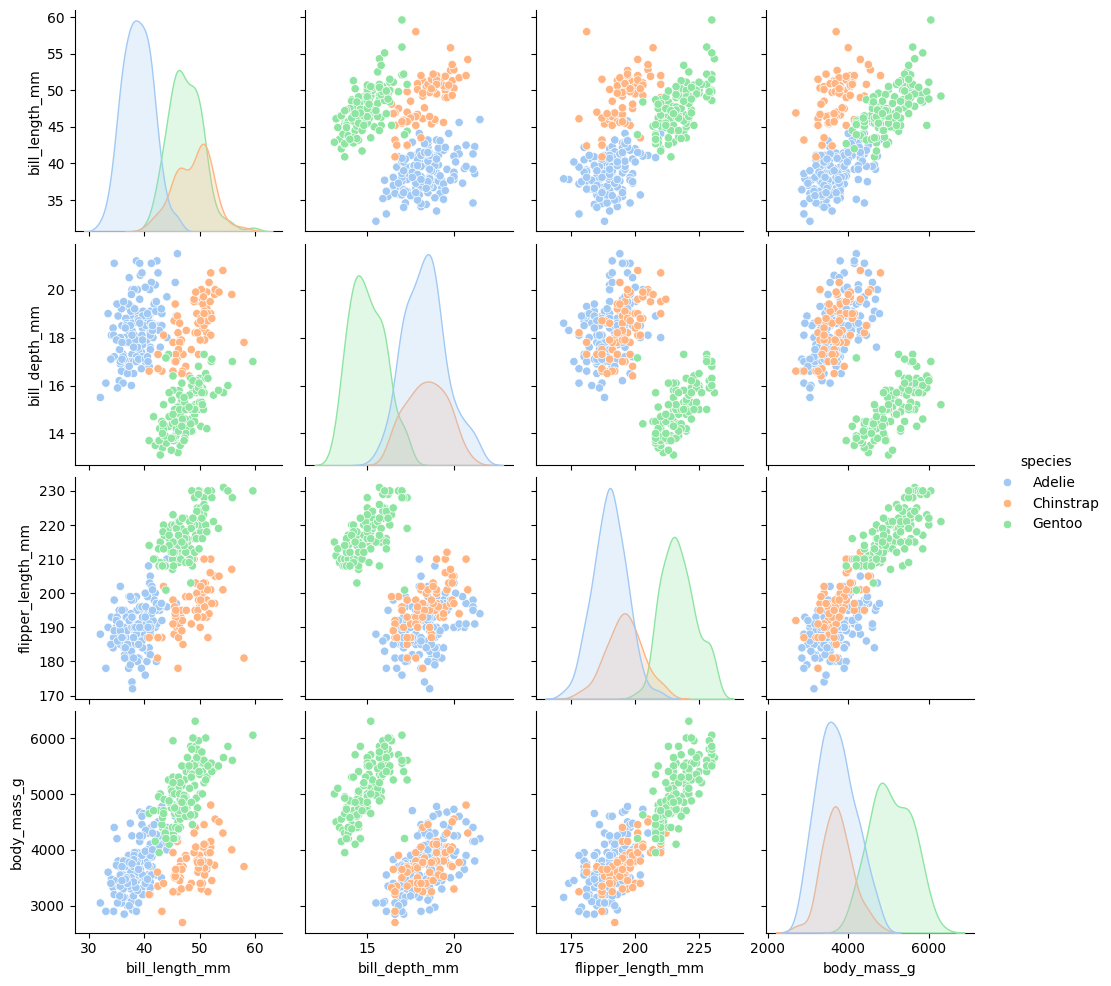

In [7]:
# resposta da questão 2.1
import pandas as pd
import seaborn as sns

# Supondo que a base de dados é carregada em um DataFrame chamado 'penguim'
# penguim = pd.read_csv('caminho/para/seu/arquivo.csv')  # Carregar a base de dados

# 1. Identificar valores nulos
print("Valores nulos por coluna antes do tratamento:")
print(penguim.isnull().sum())

# 2. Analisar os valores nulos
# Aqui você pode decidir o método de tratamento com base na quantidade de dados faltantes

# 3. Tratamento dos valores nulos

## 3.1. Imputação de valores faltantes

### Para colunas numéricas, preencher com a média
for column in penguim.select_dtypes(include=['float64', 'int64']).columns:
    penguim[column].fillna(penguim[column].mean(), inplace=True)

### Para colunas categóricas, preencher com a moda
for column in penguim.select_dtypes(include=['object']).columns:
    penguim[column].fillna(penguim[column].mode()[0], inplace=True)

# 3.2. Remoção de linhas ou colunas, se necessário (opcional)
# Remover linhas com valores nulos (se houver um pequeno número)
# penguim.dropna(inplace=True)

# Remover colunas com valores nulos (se a quantidade for significativa)
# penguim.dropna(axis=1, inplace=True)

# 4. Verificar valores nulos após o tratamento
print("\nValores nulos por coluna após o tratamento:")
print(penguim.isnull().sum())

# (Opcional) Visualização de dados para garantir que o tratamento não afetou a integridade dos dados
sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [8]:
# resposta da questão 2.2
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supondo que a base de dados é carregada em um DataFrame chamado 'penguim'
# penguim = pd.read_csv('caminho/para/seu/arquivo.csv')  # Carregar a base de dados

# Identificação das variáveis categóricas
categorical_cols = penguim.select_dtypes(include=['object']).columns

# Excluir a variável resposta se for categórica
categorical_cols = categorical_cols.difference(['species'])

# 1. Conversão de variáveis categóricas nominais usando One-Hot Encoding
for col in categorical_cols:
    if penguim[col].nunique() > 2:  # Considera variáveis nominais como aquelas com mais de 2 categorias
        # One-Hot Encoding
        one_hot = pd.get_dummies(penguim[col], prefix=f"{col}_nom")
        penguim = pd.concat([penguim, one_hot], axis=1)
        penguim.drop(col, axis=1, inplace=True)
    else:
        # Se for binária ou categórica com 2 valores, podemos assumir que é nominal para simplificação
        penguim[f"{col}_nom"] = penguim[col].astype('category').cat.codes
        penguim.drop(col, axis=1, inplace=True)

# 2. Conversão de variáveis categóricas ordinais (se houver)
# Exemplo fictício: suponha que há uma coluna 'education' com categorias ordinais
# ordinal_mapping = {'highschool': 1, 'bachelor': 2, 'master': 3, 'PhD': 4}
# penguim['education_ord'] = penguim['education'].map(ordinal_mapping)

# Verificar as primeiras linhas do DataFrame resultante
print(penguim.head())

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie        39.10000       18.70000         181.000000  3750.000000   
1  Adelie        39.50000       17.40000         186.000000  3800.000000   
2  Adelie        40.30000       18.00000         195.000000  3250.000000   
3  Adelie        43.92193       17.15117         200.915205  4201.754386   
4  Adelie        36.70000       19.30000         193.000000  3450.000000   

   island_nom_Biscoe  island_nom_Dream  island_nom_Torgersen  sex_nom  
0              False             False                  True        1  
1              False             False                  True        0  
2              False             False                  True        0  
3              False             False                  True        1  
4              False             False                  True        0  


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [9]:
# resposta da questão 2.3
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Supondo que a base de dados é carregada em um DataFrame chamado 'penguim'
# penguim = pd.read_csv('caminho/para/seu/arquivo.csv')  # Carregar a base de dados

# Identificação das variáveis categóricas
categorical_cols = penguim.select_dtypes(include=['object']).columns

# Excluir a variável resposta se for categórica
categorical_cols = categorical_cols.difference(['species'])

# 1. Conversão de variáveis categóricas nominais usando One-Hot Encoding
for col in categorical_cols:
    if penguim[col].nunique() > 2:  # Considera variáveis nominais como aquelas com mais de 2 categorias
        # One-Hot Encoding
        one_hot = pd.get_dummies(penguim[col], prefix=f"{col}_nom")
        penguim = pd.concat([penguim, one_hot], axis=1)
        penguim.drop(col, axis=1, inplace=True)
    else:
        # Se for binária ou categórica com 2 valores, podemos assumir que é nominal para simplificação
        penguim[f"{col}_nom"] = penguim[col].astype('category').cat.codes
        penguim.drop(col, axis=1, inplace=True)

# 2. Mantenha a variável resposta na primeira coluna
# Armazenar a variável resposta
response = penguim['species']

# Recriar o DataFrame com a variável resposta na primeira coluna
penguim_cleaned = pd.concat([response, penguim], axis=1)

# Exibir as primeiras linhas do DataFrame limpo
print(penguim_cleaned.head())

  species species  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Adelie        39.10000       18.70000         181.000000   
1  Adelie  Adelie        39.50000       17.40000         186.000000   
2  Adelie  Adelie        40.30000       18.00000         195.000000   
3  Adelie  Adelie        43.92193       17.15117         200.915205   
4  Adelie  Adelie        36.70000       19.30000         193.000000   

   body_mass_g  island_nom_Biscoe  island_nom_Dream  island_nom_Torgersen  \
0  3750.000000              False             False                  True   
1  3800.000000              False             False                  True   
2  3250.000000              False             False                  True   
3  4201.754386              False             False                  True   
4  3450.000000              False             False                  True   

   sex_nom  
0        1  
1        0  
2        0  
3        1  
4        0  


### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [10]:
# resposta da questão 2.4
import pandas as pd
from sklearn.model_selection import train_test_split

# Supondo que a base de dados limpa é carregada em um DataFrame chamado 'penguim_cleaned'
# penguim_cleaned = pd.read_csv('caminho/para/seu/arquivo.csv')  # Carregar a base de dados

# Separar a variável resposta (label) e os atributos (features)
X = penguim_cleaned.drop('species', axis=1)  # Atributos (features)
y = penguim_cleaned['species']               # Variável resposta (label)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=1/3,        # Proporção de 1/3 para teste
    random_state=42,      # Semente para garantir reprodutibilidade
    stratify=y            # Mantém a proporção das classes no conjunto de teste
)

# Verificar as dimensões dos conjuntos
print(f"Dimensão do conjunto de treino (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Dimensão do conjunto de teste (X_test, y_test): {X_test.shape}, {y_test.shape}")

Dimensão do conjunto de treino (X_train, y_train): (229, 8), (229, 2)
Dimensão do conjunto de teste (X_test, y_test): (115, 8), (115, 2)


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** ? 13

In [11]:
# resposta da questão 3.1

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt

# Supondo que você já tenha o DataFrame limpo 'penguim_cleaned'
# E que os conjuntos de treino e teste já tenham sido criados como X_train, X_test, y_train, y_test

# 1. Treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 2. Gerar o gráfico da árvore
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X_train.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("arvore_decisao")  # Salva o arquivo da árvore como 'arvore_decisao.pdf'

# Visualizar a árvore
graph.view()

# 3. Contar o número de folhas
num_leaves = clf.get_n_leaves()
print(f"Número de folhas na árvore treinada: {num_leaves}")


Número de folhas na árvore treinada: 13


### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** ?  Esse código realiza a divisão dos dados, treina um modelo de árvore de decisão, faz previsões, e finalmente visualiza o desempenho do modelo usando uma matriz de confusão. Se você encontrar mais problemas ou precisar de ajustes específicos

In [ ]:
# resposta da questão 3.2.a

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

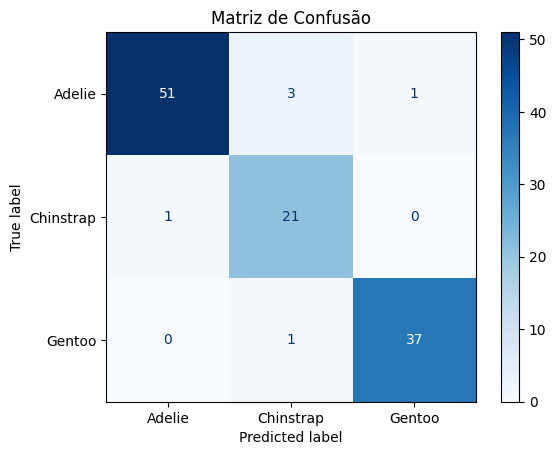

In [12]:
# resposta da questão 3.2.b
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você tenha um DataFrame 'penguim' com os dados prontos
# Substitua isso pelo carregamento dos seus dados e pré-processamento

# Exemplo de carregamento e pré-processamento de dados
# penguim = pd.read_csv('seu_arquivo.csv')

# Dividir os dados em características e variável resposta
X = penguim.drop(columns=['species'])
y = penguim['species']

# Dividir os dados em treino e teste (2/3 para treino e 1/3 para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

# Treinar o modelo de árvore de decisão
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = clf.predict(X_test)

# Garantir que y_test e y_pred sejam arrays unidimensionais
if isinstance(y_test, (pd.DataFrame, pd.Series)):
    y_test = y_test.values.ravel()
if isinstance(y_pred, (pd.DataFrame, pd.Series)):
    y_pred = y_pred.ravel()

# Caso ainda não sejam arrays unidimensionais
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Visualizar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')  # Exibe a matriz com valores inteiros

# Adicionar título e mostrar o gráfico
plt.title("Matriz de Confusão")
plt.show()

## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [13]:
# resposta da questão 4.1
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Exemplo de carregamento do DataFrame 'penguim'
# penguim = pd.read_csv('seu_arquivo.csv')

# Verificar os nomes das colunas
print("Nomes das colunas no DataFrame 'penguim':", penguim.columns)

# Dados do novo pinguim
novo_pinguim = pd.DataFrame({
    'island': ['Biscoe'],
    'bill_length_mm': [38.2],
    'bill_depth_mm': [18.1],
    'flipper_length_mm': [185.0],
    'body_mass_g': [3950.0],
    'sex': ['Male']
})

# Verificar os nomes das colunas no DataFrame 'novo_pinguim'
print("Nomes das colunas no DataFrame 'novo_pinguim':", novo_pinguim.columns)

# Codificar a variável 'island'
# Criar codificadores baseados nas colunas do DataFrame original
label_encoder_island = LabelEncoder()
label_encoder_island.fit(['Biscoe', 'Dream', 'Torgersen'])  # Ajustar conforme as categorias presentes no DataFrame original
novo_pinguim['island_nom_Biscoe'] = (novo_pinguim['island'] == 'Biscoe').astype(int)
novo_pinguim['island_nom_Dream'] = (novo_pinguim['island'] == 'Dream').astype(int)
novo_pinguim['island_nom_Torgersen'] = (novo_pinguim['island'] == 'Torgersen').astype(int)

# Codificar a variável 'sex'
label_encoder_sex = LabelEncoder()
label_encoder_sex.fit(['Male', 'Female'])  # Ajustar conforme as categorias presentes no DataFrame original
novo_pinguim['sex_nom'] = label_encoder_sex.transform(novo_pinguim['sex'])

# Ordenar as colunas de acordo com a ordem usada no treinamento
# Colunas no DataFrame final de acordo com o modelo treinado
novo_pinguim_preprocessado = novo_pinguim[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_nom_Biscoe', 'island_nom_Dream', 'island_nom_Torgersen', 'sex_nom']]

# Passo 2: Realizar a predição
# Certifique-se de que 'clf' é o modelo treinado previamente
especie_predita = clf.predict(novo_pinguim_preprocessado)

# Exibir a espécie predita
print(f'A espécie predita para o novo pinguim é: {especie_predita[0]}')


Nomes das colunas no DataFrame 'penguim': Index(['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_nom_Biscoe', 'island_nom_Dream',
       'island_nom_Torgersen', 'sex_nom'],
      dtype='object')
Nomes das colunas no DataFrame 'novo_pinguim': Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')
A espécie predita para o novo pinguim é: Adelie


---